In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [21]:
import numpy as np

In [3]:
plt.rcParams['figure.figsize'] = [15, 15]

In [4]:
all_courses = pd.read_csv("../data/uoft-first-year-data-2020-07-28.csv")

In [9]:
tutorials = all_courses[all_courses.teachingMethod.eq('TUT')]

In [16]:
tutorials_with_enrollment = tutorials[tutorials.enrollmentCapacity > 0]

In [17]:
tutorials_with_enrollment['enrollmentPercentage'] = tutorials_with_enrollment.apply(lambda row: row['actualEnrolment'] / row['enrollmentCapacity'], axis=1)

In [18]:
tutorials_with_enrollment

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,teachingMethod,enrollmentControls,enrollmentPercentage
3,USA300H1,CSUS,S,9,6,CLASS,TUT,NaN,0.666667
4,USA300H1,CSUS,S,9,1,CLASS,TUT,NaN,0.111111
5,USA300H1,CSUS,S,21,5,ONLSYNC,TUT,NaN,0.238095
6,USA300H1,CSUS,S,21,3,ONLSYNC,TUT,NaN,0.142857
21,ANA300Y1,ANA,Y,67,67,ONLSYNC,TUT,NaN,1.000000
...,...,...,...,...,...,...,...,...,...
10909,WGS367H1,WGSI,S,6,1,CLASS,TUT,NaN,0.166667
10910,WGS367H1,WGSI,S,10,4,CLASS,TUT,NaN,0.400000
10911,WGS367H1,WGSI,S,15,15,ONLSYNC,TUT,NaN,1.000000
10912,WGS367H1,WGSI,S,19,4,ONLSYNC,TUT,NaN,0.210526


In [20]:
sorted_tutorials = tutorials_with_enrollment.sort_values('enrollmentPercentage')

In [26]:
def group_by_delivery_mode_and_sum(df): 
    frame = df.groupby(['deliveryMode']).agg({'enrollmentCapacity': 'sum', 'actualEnrolment': 'sum'})
    frame['enrollmentPercentage'] = frame.apply(lambda row: row['actualEnrolment'] / row['enrollmentCapacity'] * 100, axis=1)
    return frame

In [33]:
tutorials_minus_onlasync = tutorials_with_enrollment[tutorials_with_enrollment.deliveryMode != 'ONLASYNC']

In [34]:
sections_with_multiple_delivery_modes = tutorials_minus_onlasync.groupby(['code', 'section']).filter(lambda section: len(section['deliveryMode'].unique()) > 1)

In [35]:
enrollments_with_multiple_modes = group_by_delivery_mode_and_sum(sections_with_multiple_delivery_modes)

In [36]:
enrollments_with_multiple_modes

,enrollmentCapacity,actualEnrolment,enrollmentPercentage
deliveryMode,,,
CLASS,19937,10458,52.455234
ONLSYNC,34554,23581,68.243908


In [37]:
plot = lambda df: df[['enrollmentPercentage', 'actualEnrolment']].plot(secondary_y=['actualEnrolment'], kind='bar', rot=0)

<AxesSubplot:xlabel='deliveryMode'>

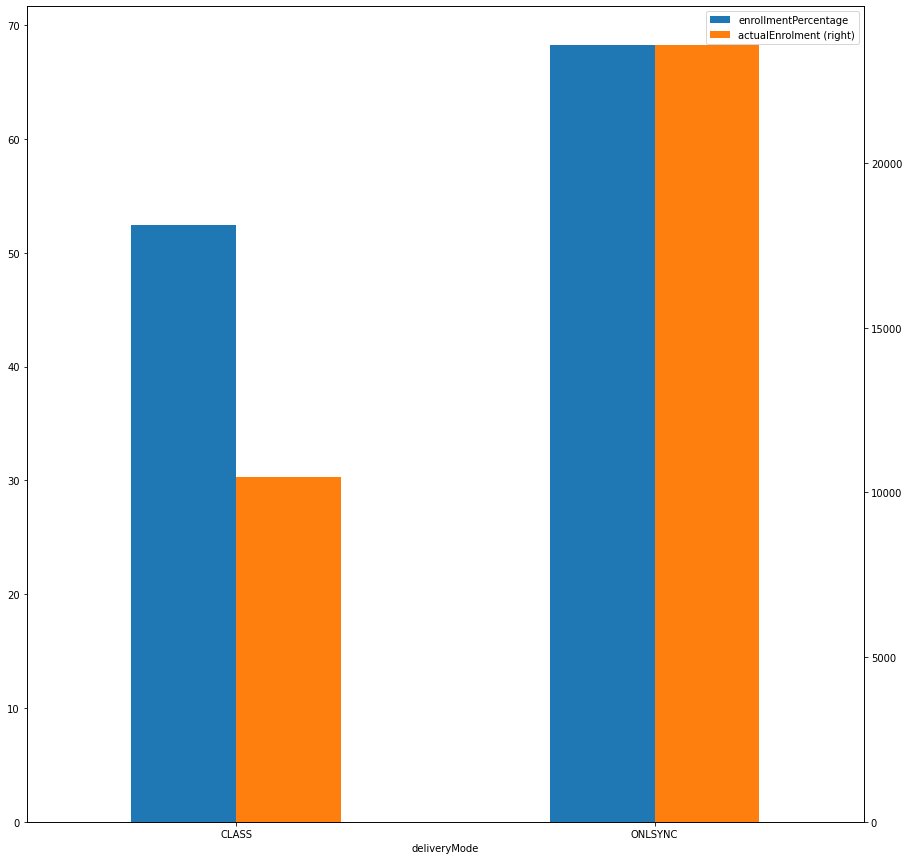

In [38]:
plot(enrollments_with_multiple_modes)

In [39]:
mat137_sections = sections_with_multiple_delivery_modes[sections_with_multiple_delivery_modes.code == 'MAT137Y1']

In [80]:
mat137_sections[:100]

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,teachingMethod,enrollmentControls,enrollmentPercentage
5526,MAT137Y1,MAT,Y,14,14,CLASS,TUT,NaN,1.000000
5527,MAT137Y1,MAT,Y,10,10,CLASS,TUT,NaN,1.000000
5528,MAT137Y1,MAT,Y,35,32,CLASS,TUT,NaN,0.914286
5529,MAT137Y1,MAT,Y,15,14,CLASS,TUT,NaN,0.933333
5530,MAT137Y1,MAT,Y,15,7,CLASS,TUT,NaN,0.466667
...,...,...,...,...,...,...,...,...,...
5613,MAT137Y1,MAT,Y,20,20,ONLSYNC,TUT,NaN,1.000000
5614,MAT137Y1,MAT,Y,11,11,ONLSYNC,TUT,NaN,1.000000
5615,MAT137Y1,MAT,Y,15,15,ONLSYNC,TUT,NaN,1.000000
5616,MAT137Y1,MAT,Y,15,15,ONLSYNC,TUT,NaN,1.000000


In [41]:
mat137_by_delivery_mode = group_by_delivery_mode_and_sum(mat137_sections)

In [42]:
mat137_by_delivery_mode

,enrollmentCapacity,actualEnrolment,enrollmentPercentage
deliveryMode,,,
CLASS,825,302,36.606061
ONLSYNC,797,788,98.870765


In [43]:
mat137_sorted = mat137_sections.sort_values('enrollmentPercentage')

In [86]:
mat137_sorted

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,teachingMethod,enrollmentControls,enrollmentPercentage
5545,MAT137Y1,MAT,Y,20,0,CLASS,TUT,NaN,0.000000
5558,MAT137Y1,MAT,Y,10,0,CLASS,TUT,NaN,0.000000
5563,MAT137Y1,MAT,Y,20,1,CLASS,TUT,NaN,5.000000
5553,MAT137Y1,MAT,Y,20,1,CLASS,TUT,NaN,5.000000
5556,MAT137Y1,MAT,Y,14,1,CLASS,TUT,NaN,7.142857
5571,MAT137Y1,MAT,Y,14,1,CLASS,TUT,NaN,7.142857
5537,MAT137Y1,MAT,Y,13,1,CLASS,TUT,NaN,7.692308
5534,MAT137Y1,MAT,Y,12,1,CLASS,TUT,NaN,8.333333
5544,MAT137Y1,MAT,Y,35,3,CLASS,TUT,NaN,8.571429
5555,MAT137Y1,MAT,Y,11,1,CLASS,TUT,NaN,9.090909


In [47]:
mat137_sorted['enrollmentPercentage'] = mat137_sorted['enrollmentPercentage'] * 100

Text(0.5, 1.0, 'MAT137 Tutorial Enrolment')

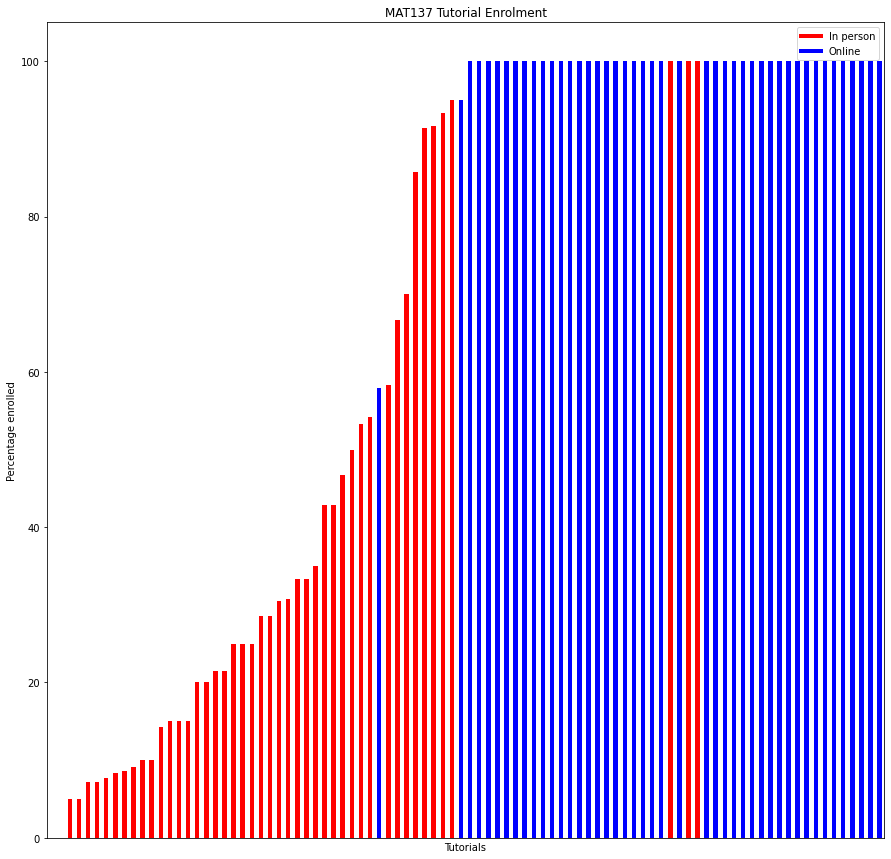

In [85]:
fig, ax = plt.subplots()
colors = tuple(np.where(mat137_sorted['deliveryMode'] == 'CLASS', 'r', 'b'))
mat137_sorted.plot(kind='bar', y='enrollmentPercentage', color=colors, ax=ax)

from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='b', lw=4)]
ax.legend(custom_lines, ['In person', 'Online'])
plt.xticks([])
plt.ylabel("Percentage enrolled")
plt.xlabel("Tutorials")
plt.title("MAT137 Tutorial Enrolment")

In [67]:
mat135_sections = sections_with_multiple_delivery_modes[sections_with_multiple_delivery_modes.code == 'MAT135H1']

In [68]:
mat135_sections

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,teachingMethod,enrollmentControls,enrollmentPercentage
5185,MAT135H1,MAT,F,30,30,ONLSYNC,TUT,NaN,1.000000
5186,MAT135H1,MAT,F,30,30,ONLSYNC,TUT,NaN,1.000000
5187,MAT135H1,MAT,F,30,30,ONLSYNC,TUT,NaN,1.000000
5188,MAT135H1,MAT,F,30,30,ONLSYNC,TUT,NaN,1.000000
5189,MAT135H1,MAT,F,30,30,ONLSYNC,TUT,NaN,1.000000
...,...,...,...,...,...,...,...,...,...
5320,MAT135H1,MAT,S,30,2,ONLSYNC,TUT,NaN,0.066667
5321,MAT135H1,MAT,S,34,0,ONLSYNC,TUT,NaN,0.000000
5322,MAT135H1,MAT,S,37,2,ONLSYNC,TUT,NaN,0.054054
5323,MAT135H1,MAT,S,29,2,ONLSYNC,TUT,NaN,0.068966


In [69]:
mat135_by_delivery_mode = group_by_delivery_mode_and_sum(mat135_sections)

In [70]:
mat135_by_delivery_mode

,enrollmentCapacity,actualEnrolment,enrollmentPercentage
deliveryMode,,,
CLASS,1062,375,35.310734
ONLSYNC,2400,1645,68.541667


In [75]:
mat135_sorted = mat135_sections.sort_values(['enrollmentPercentage', 'deliveryMode'])

In [76]:
mat135_sorted['enrollmentPercentage'] = mat135_sorted['enrollmentPercentage'] * 100

Text(0.5, 1.0, 'MAT135 Tutorial Enrolment')

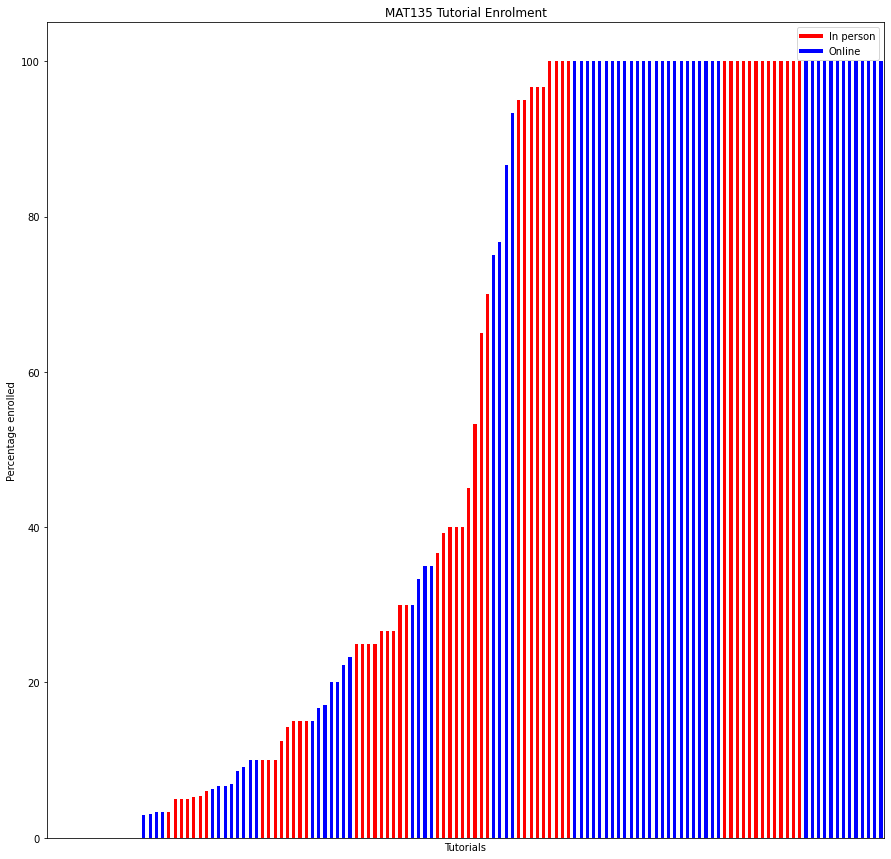

In [77]:
fig, ax = plt.subplots()
mat135_sorted.plot(kind='bar', y='enrollmentPercentage', color=np.where(mat135_sections['deliveryMode'] == 'CLASS', 'r', 'b'), ax=ax)

from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='b', lw=4)]
ax.legend(custom_lines, ['In person', 'Online'])
plt.xticks([])
plt.ylabel("Percentage enrolled")
plt.xlabel("Tutorials")
plt.title("MAT135 Tutorial Enrolment")